In [1]:
from google.colab import drive
import pandas as pd
import numpy as np

In [2]:
path="/content/drive/MyDrive/Fitlyf/AssignmentData.xlsx"
funnel=pd.read_excel(path, sheet_name='WorkerFunnel')


In [3]:
funnel.head() # It displays first five rows of WorkerFunnel data

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
0,2015-01-01 00:00:00,Q1,Sewing,0.8,7080,59,0.940725
1,2015-01-01 00:00:00,Q1,Finishing,0.75,960,8,0.8865
2,2015-01-01 00:00:00,Q1,Sewing,0.8,3660,30.5,0.80057
3,2015-01-01 00:00:00,Q1,Sewing,0.8,3660,30.5,0.80057
4,2015-01-01 00:00:00,Q1,Sewing,0.8,1920,56,NaN


# Section 1 - Funnel Analysis

# **Q.1 Identify and appropriately handle the missing/blank and duplicate values in the dataset, and explain the logic behind your strategy in a short paragraph.**

**Exploratory Data Analysis**

In [4]:
funnel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Date                   1197 non-null   object
 1   Quarter                1197 non-null   object
 2   Department             1197 non-null   object
 3   Targeted Productivity  1197 non-null   object
 4   Overtime               1197 non-null   object
 5   No. of Workers         1197 non-null   object
 6   Actual Productivity    1168 non-null   object
dtypes: object(7)
memory usage: 65.6+ KB


In [5]:
funnel.dtypes

,0
Date,object
Quarter,object
Department,object
Targeted Productivity,object
Overtime,object
No. of Workers,object
Actual Productivity,object


**1. Change Data Types**

In [6]:
funnel['Date']= pd.to_datetime(funnel['Date'])

In [7]:
funnel['Quarter']= funnel['Quarter'].astype('category')

In [8]:
funnel['Department']= funnel['Department'].astype('category')

In [9]:
funnel['Targeted Productivity']=pd.to_numeric(funnel['Targeted Productivity'].replace('What do you think should be here?',0), errors='coerce')

In [10]:
funnel['Overtime']= pd.to_numeric(funnel['Overtime'], errors='coerce')

In [11]:
funnel['No. of Workers']= pd.to_numeric(funnel['No. of Workers'], errors='coerce')
funnel['Actual Productivity']= pd.to_numeric(funnel['Actual Productivity'], errors='coerce')

**2. Missing Values and Duplicate handling**

In [12]:
missing_values = funnel.isnull().sum() # This code check for missing values
missing_values

,0
Date,0
Quarter,0
Department,0
Targeted Productivity,0
Overtime,1
No. of Workers,1
Actual Productivity,30


There are 29 missing values in 'Actual Productivity' column

In [13]:
duplicate_values= funnel.duplicated().sum() # This code check for duplicate values
duplicate_values

35

**3. Handling missing values and duplicates**

In [14]:
funnel['Actual Productivity'].fillna(funnel['Actual Productivity'].mean(), inplace=True) # This code fill the missing values with mean of column

In [15]:
funnel.isnull().sum() # Check missing values are filled or not

,0
Date,0
Quarter,0
Department,0
Targeted Productivity,0
Overtime,1
No. of Workers,1
Actual Productivity,0


In [16]:
funnel.drop_duplicates(inplace=True) # This code drop the duplicate value

In [17]:
funnel.duplicated().sum()

0

Now we can see there are no duplicate and missing values in dataset

In [18]:
funnel.describe() #Summary Statistics

,Date,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
count,1162,1162.000000,1161.0000,1161.000000,1162.000000
mean,2015-04-15 16:54:56.385542400,0.727685,4490.8441,34.356589,0.733053
min,2015-01-01 00:00:00,0.000000,0.0000,2.000000,0.233705
25%,2015-01-27 00:00:00,0.700000,1440.0000,9.000000,0.650410
50%,2015-02-24 12:00:00,0.750000,3960.0000,34.000000,0.750760
75%,2015-07-02 00:00:00,0.800000,6900.0000,57.000000,0.850137
max,2015-12-02 00:00:00,0.800000,25920.0000,89.000000,1.120437
std,NaN,0.100392,3305.1176,22.196456,0.173033


# **Q. 2 Principal Component Analysis (PCA)**

**(i) Perform PCA on the following standardized features: Targeted Productivity, Overtime, No. of Workers, and Actual Productivity.**

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [20]:
features=['Targeted Productivity', 'Overtime', 'No. of Workers', 'Actual Productivity'] # Selected features

#Standardized the features
scaler= StandardScaler()
funnel_scaled= scaler.fit_transform(funnel[features])

#Convert back to Dataframe for easier interpretation
funnel_scaled_df= pd.DataFrame(funnel_scaled, columns=features)

In [21]:
funnel_scaled_df.dropna(subset=features, inplace=True)

**Perform PCA**

In [22]:
#Apply PCA
pca=PCA()
pca_result = pca.fit_transform(funnel_scaled_df)

#Explained variance by each component
explained_variance= pca.explained_variance_ratio_
explained_variance

array([0.44802958, 0.3335723 , 0.15206804, 0.06633008])

**(ii) Determine the number of principal components that explain at least 90% of the variance in the data.**

In [23]:
#Cumulative explained variance
cumulative_variance= np.cumsum(explained_variance)

#Number of components explaining 90% of variance
n_components= np.argmax(cumulative_variance >= 0.90)+1

print(n_components, cumulative_variance)

3 [0.44802958 0.78160188 0.93366992 1.        ]


**(iii) Visualize the explained variance by each principal component.**

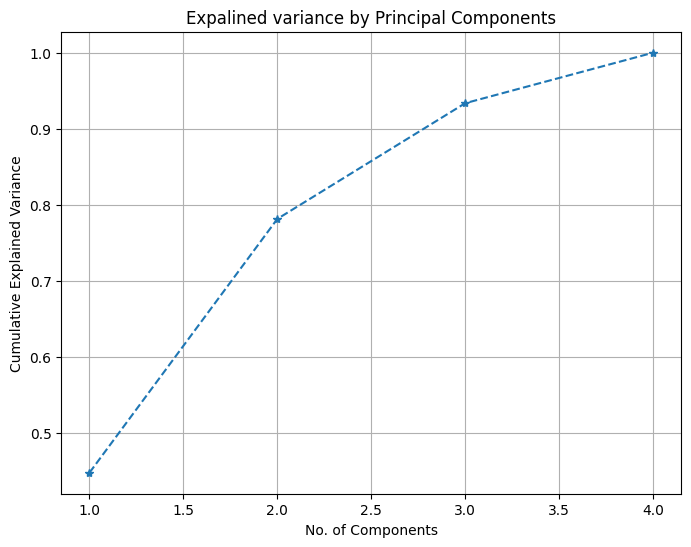

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(range(1,len(cumulative_variance)+1), cumulative_variance, marker='*', linestyle='--')
plt.xlabel('No. of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Expalined variance by Principal Components')
plt.grid(True)
plt.show()

Above code visualize how much variance explained as more principal components are added
- From the curve I can see that most of the data variance can be captired using the first two or three components, as the curve starts to flatten after the third component .
- This suggests the using two or three components is sufficient to capture majority of inforamtion in the dataset, making it an effective dimentionality reduction technique

# **Q. 3 Predictive Modeling and Time Series Analysis**

**(i) Build an ARIMA model to forecast the Actual Productivity for the next four quarters (four weeks).**

In [25]:
from statsmodels.tsa.arima.model import ARIMA

In [26]:
#Extract Actual Productivity Series
productivity_series= funnel['Actual Productivity']

# Fit the data into ARIMA model
model = ARIMA(productivity_series, order=(1,1,1))
model_fit= model.fit()

# forecast next 4 weeks
forecast= model_fit.forecast(steps=4)

forecast

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

,predicted_mean
1162,0.520563
1163,0.596421
1164,0.642147
1165,0.669712


**(ii) Evaluate the model using Mean Absolute Percentage Error (MAPE) and Mean Squared Error (MSE).**

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

#Calculate MAPE and MSE
mape=mean_absolute_percentage_error(productivity_series[-4:],forecast)
mse= mean_squared_error(productivity_series[-4:], forecast)

print("mean_absolute_percentage_error= ", mape)
print("mean_squared_error= ", mse)

mean_absolute_percentage_error=  0.32608198733125326
mean_squared_error=  0.03524274497625424


**(iii) Visualize the forecasted vs actual productivity values, and interpret the model’s accuracy.**

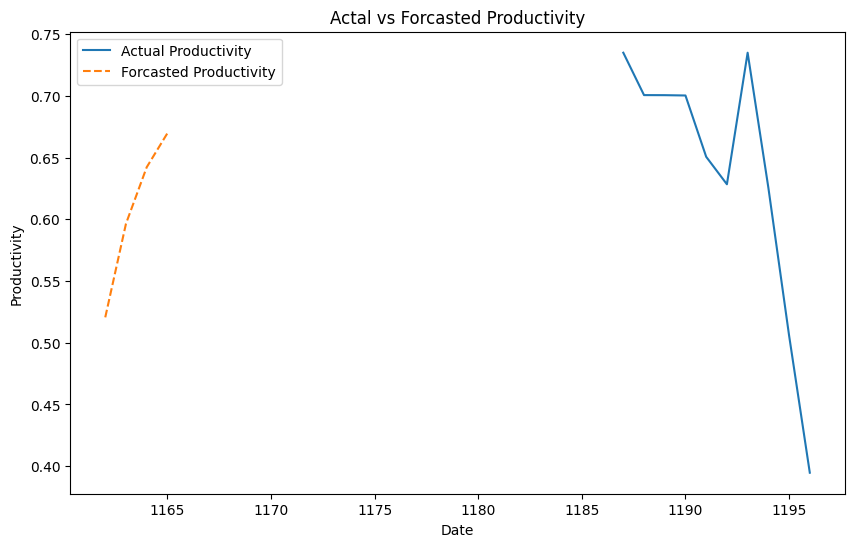

In [28]:
plt.figure(figsize=(10,6))
plt.plot(productivity_series.index[-10:], productivity_series[-10:], label='Actual Productivity')
plt.plot(forecast.index, forecast, label='Forcasted Productivity', linestyle='--' )
plt.xlabel('Date')
plt.ylabel('Productivity')
plt.title('Actal vs Forcasted Productivity')
plt.legend()
plt.show()

# Q.4 **Culstering Analysis**

**(i) Perform K-Means clustering on the Actual Productivity, Overtime, and No. of Workers.**

In [29]:
from sklearn.cluster import KMeans
# Select relevant features for clustering
cluster_features= funnel[['Actual Productivity','Overtime', 'No. of Workers']]

In [30]:
#cluster_features.dropna(inplace=True)

In [31]:
print(len(funnel))
print(len(cluster_features))

1162
1162


In [32]:
cluster_features= cluster_features.fillna(cluster_features.mean())

In [33]:
#funnel= pd.DataFrame()

In [34]:
#Apply KMeans Clusteing
kmeans=KMeans(n_clusters=3, random_state=42)
funnel['Cluster']= kmeans.fit_predict(cluster_features)

#Cluster centriods
kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([[7.44458608e-01, 1.63508741e+03, 1.73214276e+01],
       [7.20435907e-01, 6.13607992e+03, 4.95951835e+01],
       [7.26408649e-01, 1.04400000e+04, 5.44870130e+01]])

**(ii) Determine the optimal number of clusters using the Elbow method.**

In [35]:
sse=[]
for k in range(1,10):
  kmeans=KMeans(n_clusters=k, random_state=42)
  kmeans.fit(cluster_features)
  sse.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

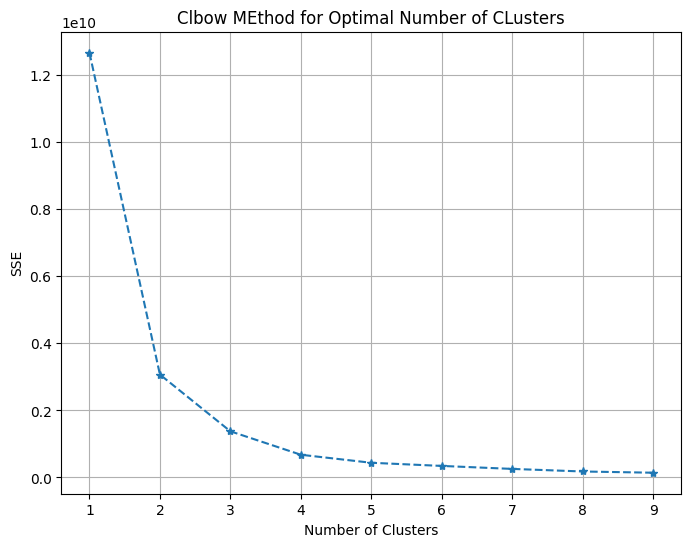

In [36]:
#Plot SSE against number of clusters

plt.figure(figsize=(8,6))
plt.plot(range(1,10), sse, marker='*', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Clbow MEthod for Optimal Number of CLusters')
plt.grid(True)
plt.show()


**(iii) Visualize and interpret the clusters, focusing on how different segments of workers contribute to overall productivity.**

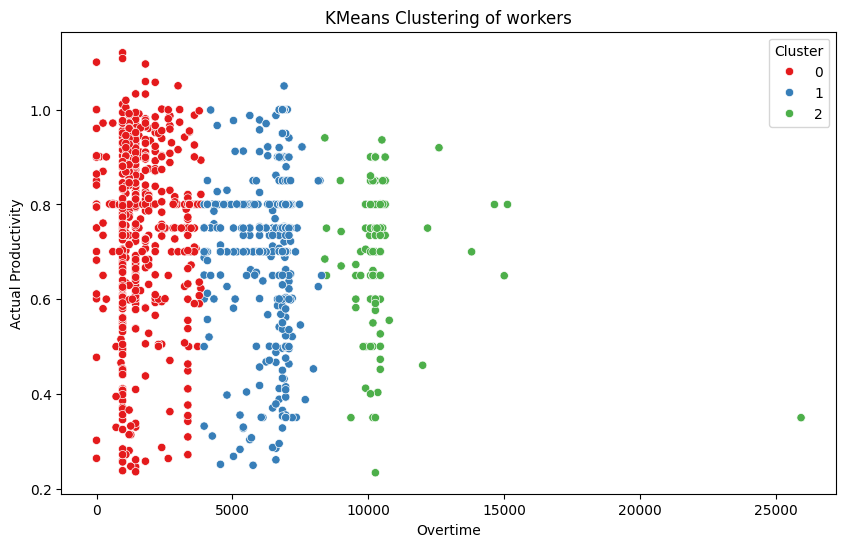

In [37]:
#Visualize the clusters
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(x='Overtime', y='Actual Productivity', hue='Cluster', data=funnel, palette='Set1')
plt.xlabel('Overtime')
plt.ylabel('Actual Productivity')
plt.title('KMeans Clustering of workers')
plt.show()

#**Section 2: Anomaly Detection**

**Q.1 Data Import and Exploration**

In [38]:
path="/content/drive/MyDrive/Fitlyf/AssignmentData.xlsx"
transaction=pd.read_excel(path, sheet_name='creditcard')

**Explaoratory Data Analysis**

In [39]:
transaction.head() #To see first five rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [40]:
transaction.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [41]:
transaction.dtypes

,0
Time,int64
V1,float64
V2,object
V3,float64
V4,float64
V5,float64
V6,float64
V7,object
V8,float64
V9,object


In [42]:
transaction['V2']= pd.to_numeric(transaction['V2'].replace("I think you're doing good!",0), errors='coerce')

In [43]:
transaction['V7'] = pd.to_numeric(transaction['V7'], errors='coerce')

In [44]:
transaction['V9'] = pd.to_numeric(transaction['V9'], errors='coerce')

In [45]:
transaction['V24'] = pd.to_numeric(transaction['V24'], errors='coerce')

In [46]:
transaction.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,2
V8,0
V9,1


In [47]:
transaction.dropna(subset=['V7', 'V9', 'V24'], inplace=True)

In [48]:
transaction.dtypes

,0
Time,int64
V1,float64
V2,float64
V3,float64
V4,float64
V5,float64
V6,float64
V7,float64
V8,float64
V9,float64


In [49]:
print(transaction['Class'].value_counts()) #To see ratio of fradulant to non fradulant

Class
0    284311
1       492
Name: count, dtype: int64


**Visualize the distribution of transaction amounts for both fraudulent and non-fraudulent transactions.**


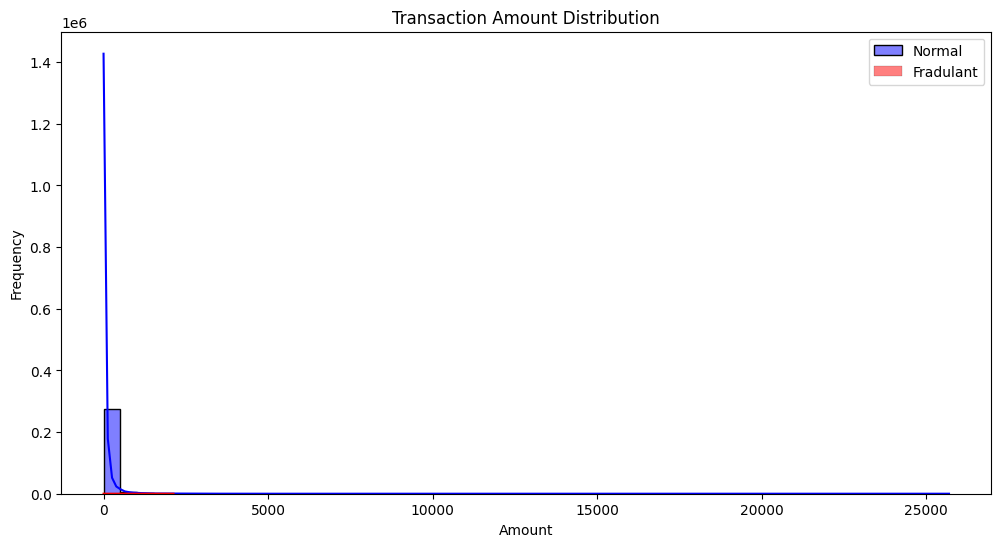

In [50]:
plt.figure(figsize=(12,6))

#Plot for Normal Transactions
sns.histplot(transaction[transaction['Class']==0]['Amount'], bins=50, kde=True, color='blue',label='Normal')



#Plot for Fradulant Transactions
sns.histplot(transaction[transaction['Class']==1]['Amount'], bins=50, kde=True, color='red',label='Fradulant')

plt.legend()
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

# Q.2 **Feature Engineering**

**scaling on the Amount and Time features**

In [51]:
from sklearn.preprocessing import MinMaxScaler
import joblib

scaler= MinMaxScaler()
transaction[['Amount', 'Time']]= scaler.fit_transform(transaction[['Amount', 'Time']])

joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

**Apply PCA for visualization**

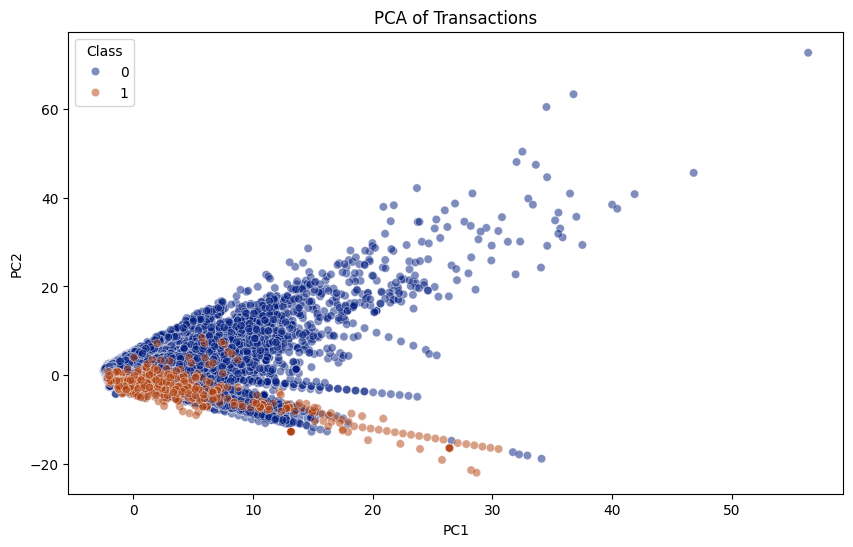

In [52]:
features= transaction.drop('Class',axis=1)
pca= PCA(n_components=2)
pca_features= pca.fit_transform(features)

#Add PCA features back to dataframe
pca_df= pd.DataFrame(pca_features, columns=['PC1','PC2'])
pca_df['Class']= transaction['Class'].values

plt.figure(figsize=(10,6))
sns.scatterplot(x='PC1',y='PC2', hue='Class', data=pca_df, palette='dark', alpha=0.5)
plt.title('PCA of Transactions')
plt.show()

In [53]:
import joblib
joblib.dump(features.columns.tolist(), 'featurename.pkl')

['featurename.pkl']

In [54]:
from google.colab import files
files.download('/content/featurename.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Q.3 **Anomaly Detection Model**

**Isolation Forest**

In [55]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, roc_auc_score

In [56]:
#Train Isolation Forest
iso_forest= IsolationForest(contamination=0.001, random_state=42)
iso_forest.fit_predict(features)

array([1, 1, 1, ..., 1, 1, 1])

In [57]:
import joblib
joblib.dump(iso_forest, 'iso_forest_model1.pkl')

['iso_forest_model1.pkl']

In [58]:
transaction['anomaly']= iso_forest.fit_predict(features)

In [59]:
#Convert predictions to binary
transaction['anomaly']=transaction['anomaly'].map({1:0, -1:1})

In [60]:
#Evaluate
print(classification_report(transaction['Class'], transaction['anomaly']))
print('ROC-AUC: ', roc_auc_score(transaction['Class'], transaction['anomaly']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284311
           1       0.27      0.16      0.20       492

    accuracy                           1.00    284803
   macro avg       0.63      0.58      0.60    284803
weighted avg       1.00      1.00      1.00    284803

ROC-AUC:  0.577886235910275


In [61]:
 mmmmmmmmmmm#import joblib
#joblib.dump(iso_forest, 'iso_forest_model.pkl')

In [62]:
#from sklearn.ensemble import IsolationForest
#from sklearn.metrics import classification_report, roc_auc_score

In [63]:
#Train Isolation Forest
#iso_forest= IsolationForest(contamination=0.001, random_state=42)
#transaction['anomaly']= iso_forest.fit_predict(features)

In [64]:
#Convert predictions to binary
#transaction['anomaly']=transaction['anomaly'].map({1:0, -1:1})

In [65]:
#Evaluate
#print(classification_report(transaction['Class'], transaction['anomaly']))
#print('ROC-AUC: ', roc_auc_score(transaction['Class'], transaction['anomaly']))mmmmmmmmmmmmmmmmmmmmmmmmmmmmm

In [66]:
#

**Local Outlier Factor(LOF)**

In [67]:
from sklearn.neighbors import LocalOutlierFactor

# Train LOF
lof= LocalOutlierFactor(n_neighbors=20,contamination=0.001)
transaction['anomaly']= lof.fit_predict(features)

In [68]:
#Convert predictions to binary
transaction['anomaly']=transaction['anomaly'].map({1:0, -1:1})


In [69]:
pca_df['anomaly']=transaction['anomaly'].reset_index(drop=True) #Add anomaly prediction to pca_df

In [70]:
pca_df.columns

Index(['PC1', 'PC2', 'Class', 'anomaly'], dtype='object')

In [71]:
# Evaluate
print(classification_report(transaction['Class'], transaction['anomaly']))
print('ROC-AUC: ', roc_auc_score(transaction['Class'], transaction['anomaly']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284311
           1       0.00      0.00      0.00       492

    accuracy                           1.00    284803
   macro avg       0.50      0.50      0.50    284803
weighted avg       1.00      1.00      1.00    284803

ROC-AUC:  0.49949878829872923


# Q.4 **Visualizing Anomalies**

In [72]:
pca_df.columns

Index(['PC1', 'PC2', 'Class', 'anomaly'], dtype='object')

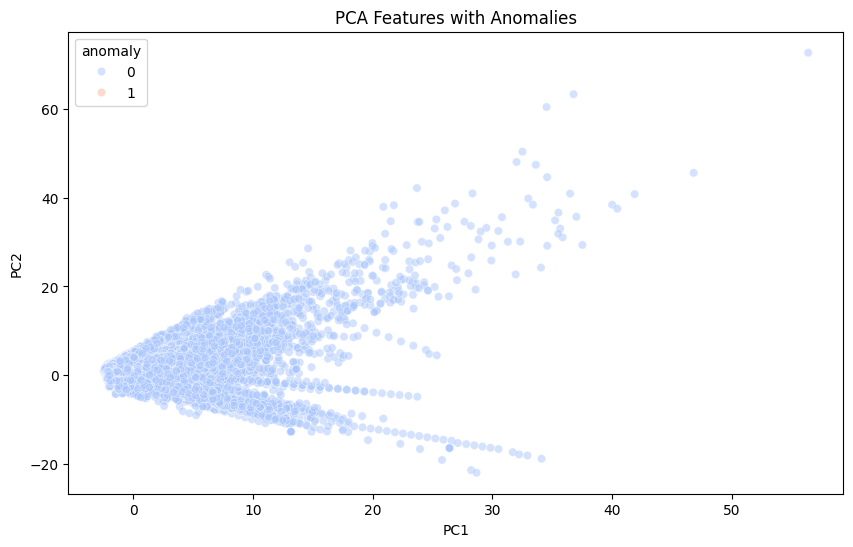

In [73]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='PC1',y='PC2', hue='anomaly', data=pca_df, palette='coolwarm', alpha=0.5)
plt.title('PCA Features with Anomalies')
plt.show()

In [75]:
from google.colab import files
files.download('/content/iso_forest_model1.pkl')
files.download('/content/scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Function for new Dataset**

In [76]:
def detect_fradulent_transactions(new_data, model):

  #Apply scaling
  new_data[['Amount', 'Time']]= scaler.transform(new_data[['Amount','Time']])

  #Predict anomalies
  predictions= model.predict(new_data.drop('Class',axis=1))
  predictions= pd.Series(predictions),map({1:0, -1:1})

  return new_data[predictions==1]

**Develping a streamlit app**


In [77]:
pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.5 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [78]:
import streamlit as st

In [79]:
#path="/content/drive/MyDrive/Fitlyf/AssignmentData.xlsx"
#transaction=pd.read_excel(path, sheet_name='creditcard')

In [80]:
#function to detect fradulant transactions
def detect_fraudulent_transactions(new_data, iso_forest, scaler):

  #Apply scaling
  new_data[['Amount', 'Time']]= scaler.transform(new_data[['Amount','Time']])

  #Predict anomalies
  predictions= model.predict(new_data.drop('Class',axis=1))
  predictions= pd.Series(predictions),map({1:0, -1:1}) #1 for Normal, -1 for anomaly

  return new_data[predictions==1]

In [81]:
#Load pre-trained model and scaler
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore", category=UserWarning, module='streamlit')

iso_forest= IsolationForest(contamination=0.001, random_state=42)
scaler= MinMaxScaler()

#Streamlit app
st.title("Credit Card Fraud Detection")
st.write("Upload a excel file with credit card transactions to detect frauds")

#path="/content/drive/MyDrive/Fitlyf/AssignmentData.xlsx"
uploaded_file= st.file_uploader ("Choose an Excel File", type=['xlsx','xls'])
if uploaded_file is not None:
  try:
    #  Read excel file
    new_transactions= pd.read_excel(uploaded_file, sheet_name='creditcard_test')

    #Check if necessary columns are present in uploaded file
    required_columns= ['Amount','Time','Class']
    if all (column in new_transactions.columns for column in required_columns):
      #Scale data
      new_transactions[['Amount','Time']]= scaler.fit_transform(new_transactions[['Amount','Time']])

      #Detect Fradulat transactions
      fradulant_transactions= detect_fraudulent_transactions(new_transactions, iso_forest, scaler)

      #Dispaly results
      st.write(f"Number of fradulant transactions detected: {len(fradulant_transactions)}")
      st.dataframe(fradulant_transactions)

      #Visualization
      if not fradulant_transactions.empty:
        plt.figure(figsize=(10,6))
        sns.scatterplot(x='Amount', y='Time', hue=fradulant_transactions['Class'], data=fradulant_transactions)
        plt.title('Detected Fradulant Transactions')
        st.pyplot(plt)
    else:
      st.write("The uploaded file does not contain the required columns: 'Amount', 'Time', 'Class' ")
  except Exception as e:
      st.write(f"An error occured while reading the Excel file: {e}")
else:
  st.write("Please upload a file to proceed")

2024-09-02 10:59:22.763 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-02 10:59:22.938 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-09-02 10:59:22.943 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-02 10:59:22.946 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-02 10:59:22.948 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-02 10:59:22.950 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-02 10:59:22.956 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-02 10:59:22.958 Thread 'MainThread': mi